In [2]:
import datetime
import pandas as pd
import matplotlib as mpl
%matplotlib inline

nasa = pd.read_csv("../Labs files//course-files/nasa_facebook_statuses.csv",
                    usecols=["status_published","num_reactions", "num_comments",
                             "num_shares","num_likes"])

nasa["status_published"] = pd.to_datetime(nasa["status_published"])

filter =(nasa['status_published'] >= '2016-3-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]

nasa['month'] = nasa.apply(lambda row: row["status_published"].month,axis=1)

nasa_by_month = nasa.groupby(by='month').sum()
nasa_by_month.head()

/var/folders/rz/24qlfvg126sfp2zf4589lt9h0000gn/T/ipykernel_47368/530282391.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nasa_by_month = nasa.groupby(by='month').sum()


,num_reactions,num_comments,num_shares,num_likes
month,,,,
3,3003815,49108,392585,2846361
4,2927616,120118,370803,2760385
5,2708977,46122,393576,2548960


<AxesSubplot: ylabel='num_likes'>

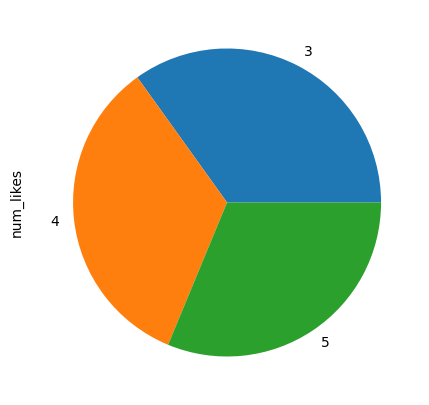

In [7]:
nasa_by_month['num_likes'].plot(kind='pie',figsize=(5,5))

<AxesSubplot: title={'center': 'NASA Facebook activity'}, ylabel='num_likes'>

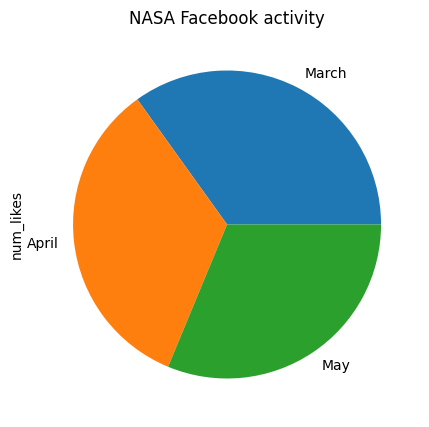

In [14]:
months = {3: "March",4: 'April', 5: 'May'}

nasa_by_month['num_likes'].plot(kind='pie',figsize=(5,5), title='NASA Facebook activity',
                               labels=(months[3],months[4],months[5]))

array([[<AxesSubplot: ylabel='num_reactions'>,
        <AxesSubplot: ylabel='num_comments'>],
       [<AxesSubplot: ylabel='num_shares'>,
        <AxesSubplot: ylabel='num_likes'>]], dtype=object)

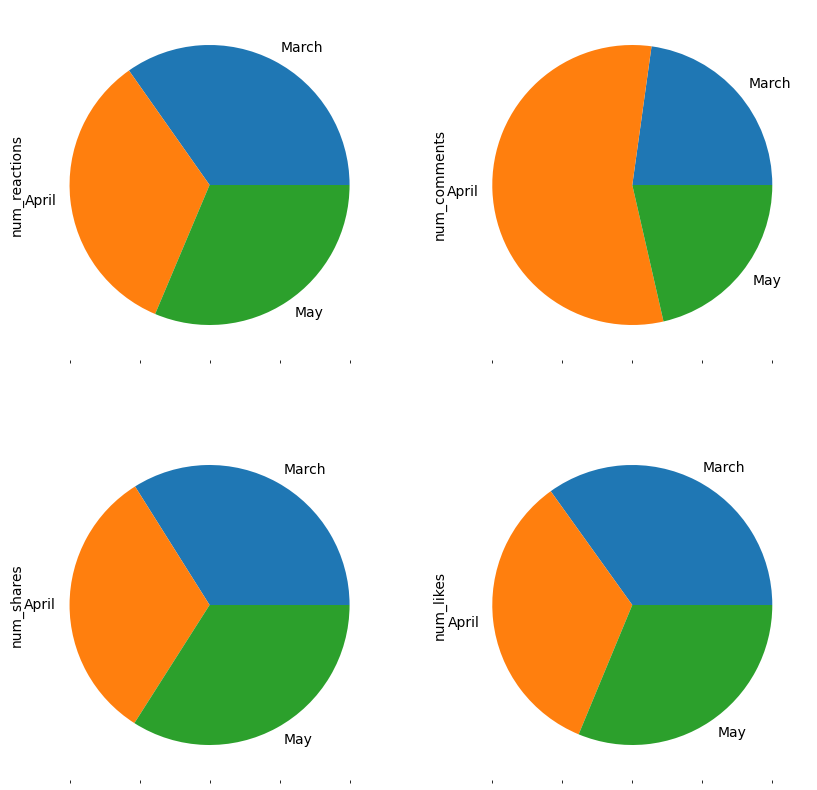

In [27]:
nasa_by_month.plot(kind='pie',subplots=True, labels=(months[3],months[4],months[5]),
                  figsize=(10,10),legend=False,layout =(2,2))

array([[<AxesSubplot: ylabel='num_reactions'>,
        <AxesSubplot: ylabel='num_comments'>],
       [<AxesSubplot: ylabel='num_shares'>,
        <AxesSubplot: ylabel='num_likes'>]], dtype=object)

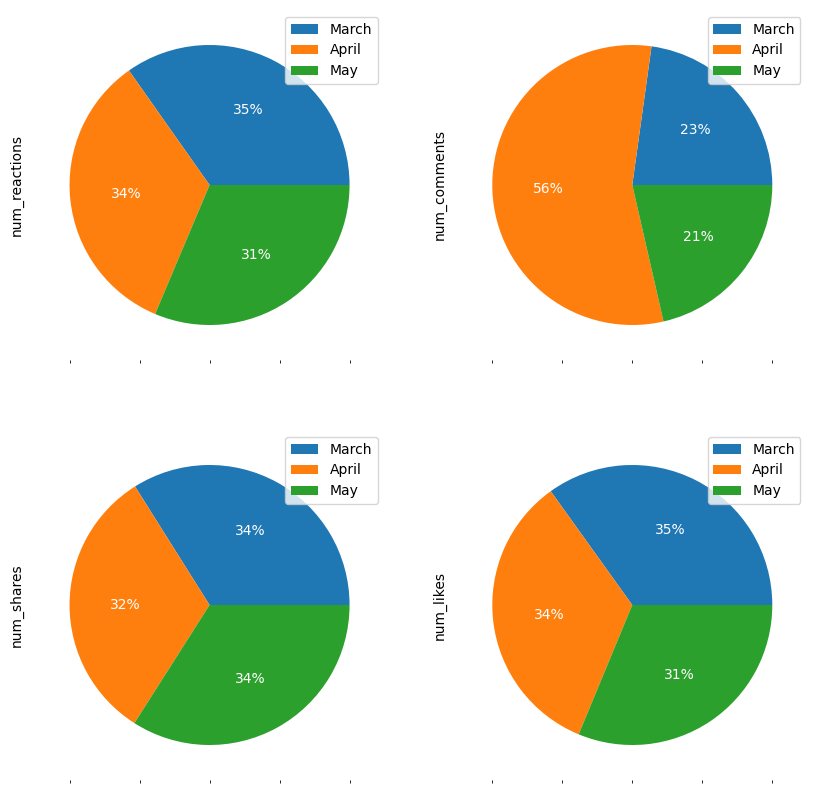

In [41]:
nasa_by_month.plot(kind='pie',subplots=True, labels=(months[3],months[4],months[5]),
                  figsize=(10,10),legend=True,layout =(2,2),autopct='%.0f%%',
                  textprops={'color': 'white'})